In [2]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [4]:
import os

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [6]:
import glob
import cPickle as pickle
import sklearn.metrics

In [8]:
experiments = ['C.Figure1.position_common_scale']
all_labels = {'C.Figure1.position_common_scale': ['Position Y', '+ Position X', '+ Spotsize'], \
              'C.Figure1.position_non_aligned_scale': ['Scale', '+ Y', '+ X', '+ Spotsize'],\
              'C.Figure1.length': ['Length', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], \
              'C.Figure1.angle': ['Angle', '+ Position Y', '+ Position X'], \
              'C.Figure1.area': ['Area', '+ Position Y', '+ Position X'], \
              'C.Figure1.volume': ['Volume', '+ Position Y', '+ Position X'], \
              'C.Figure1.curvature': ['Curvature', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.shading': ['Shading', '+ Position Y', '+ Position X']
              }

all_results = {}

for experiment in experiments:

    e_dir = os.path.join(RESULTS_DIR, experiment)
    datasets = sorted(os.listdir(e_dir))
    print datasets
    results = [None]*4

    classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
    for i,c in enumerate(classifiers):

        results[i] = []
        for d in datasets:
            d_dir = os.path.join(e_dir, d)

#             stats_files = ['01_noise.p', '02_noise.p', '03_noise.p', '04_noise.p']#glob.glob(os.path.join(d_dir, c)+'/*.p')
            stats_files = glob.glob(os.path.join(d_dir, c)+'/*.p')
#             print stats_files
#             break
            y_s = []

            for s in stats_files:
            
                if s.endswith('noise.p'):
                    continue
            
#                 stats_file = os.path.join(d_dir, c)+'/'+s
                stats_file = s
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as f:
                        stats = pickle.load(f)
                    y_s.append([stats['y_pred'], stats['y_test']])
                    

            results[i].append(y_s)
            
    print 'Loaded', experiment
            
    all_results[experiment] = results
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

['0', '1', '2']
Loaded C.Figure1.position_common_scale


In [9]:

# adjust values to match dictionaries/lists above
experiment = 0 # C.Figure1.position_common_scale
classifier = 1 # LeNet
dataset = 0 # Position Y


samples = all_results[experiments[experiment]][classifier][dataset]
no_samples = len(samples)
print 'No. Samples', no_samples

#
# this can be looped
#
current_sample_index = 0 # 0..no_samples-1
current_y_pred = samples[current_sample_index][0].ravel()
current_y_test = samples[current_sample_index][1].ravel()

print 'First 10 predictions', current_y_pred[0:10]
print 'First 10 groundtruth', current_y_test[0:10]
print 'MAE', sklearn.metrics.mean_absolute_error(current_y_pred, current_y_test)
print 'MLAE (from Cleveland)', np.log2(sklearn.metrics.mean_absolute_error(current_y_pred*100, current_y_test*100)+.125)

No. Samples 9
First 10 predictions [ 0.32068959  0.51641536  0.50112879  0.71021342  0.90569484  0.56344223
  0.06230417  0.56344223  0.90569484  0.89905334]
First 10 groundtruth [ 0.30909091  0.54545456  0.5272727   0.76363635  0.9818182   0.60000002
  0.01818182  0.60000002  0.9818182   1.0181818 ]
MAE 0.0641016
MLAE (from Cleveland) 2.70822267743


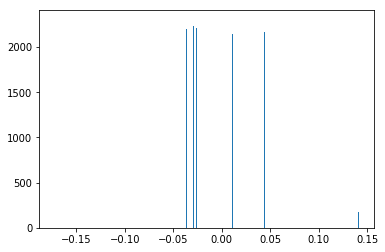

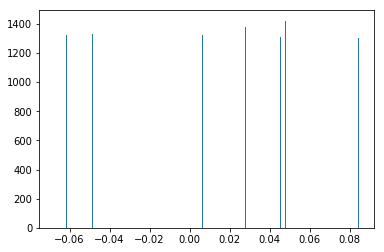

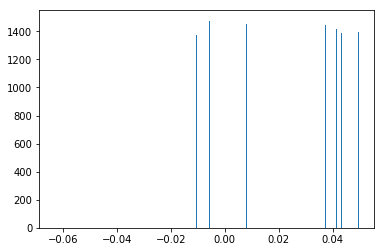

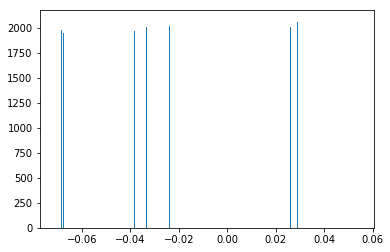

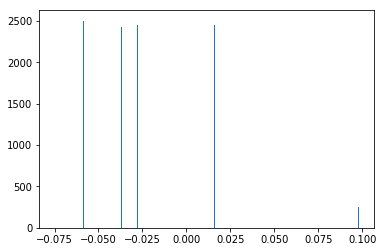

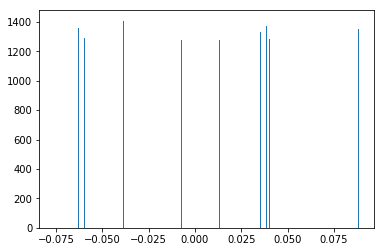

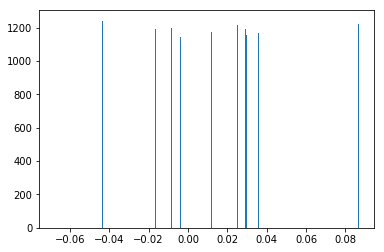

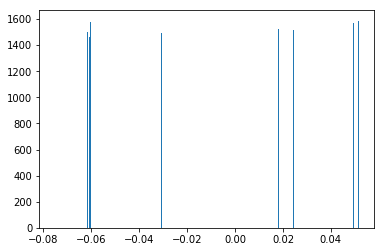

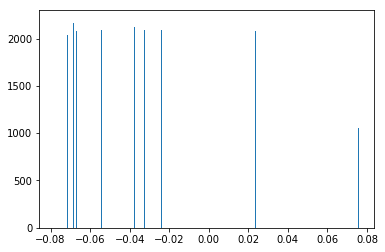

In [14]:
# loop through all samples for this experiment+classifier+dataset combination
for current_sample_index in range(no_samples):
    
    current_y_pred = samples[current_sample_index][0].ravel()
    current_y_test = samples[current_sample_index][1].ravel()
    
    errors = current_y_pred - current_y_test
    plt.figure()
    plt.hist(errors, bins=500)
    
